<a href="https://colab.research.google.com/github/malavika-aiml/MLPROJECT/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

Analyzing and Predicting Customer Sentiment for Amazon Alexa Reviews

Context:
Amazon Alexa is one of the world’s most popular voice assistants. The quality of customer experience directly impacts Alexa’s market success. The Amazon Alexa Customer Reviews Dataset contains user reviews, ratings, and feedback which can be leveraged to understand user satisfaction, identify improvement areas, and predict future sentiment trends.

Business Problem:
Amazon wants to improve customer satisfaction and retention for Alexa devices. However, reviews come in unstructured text form, making it difficult to systematically track key pain points, emerging issues, and overall sentiment.

Objective:

Primary Goal: Use the dataset to analyze customer sentiment, extract key themes, and predict sentiment labels (positive/negative/neutral) from the review text.

In [98]:
from google.colab import files
uploaded=files.upload()

Saving amazon_alexa.csv to amazon_alexa (3).csv


In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df_alexa=pd.read_csv("amazon_alexa.csv")

In [101]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [124]:
df_alexa.shape

(3150, 18)

In [102]:
df_alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [103]:
df_alexa["variation"].value_counts()

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


STEP 03#VISUALISING THE **DATA**

In [104]:
df_alexa["feedback"].value_counts()

,count
feedback,
1,2893
0,257


<Axes: xlabel='rating', ylabel='count'>

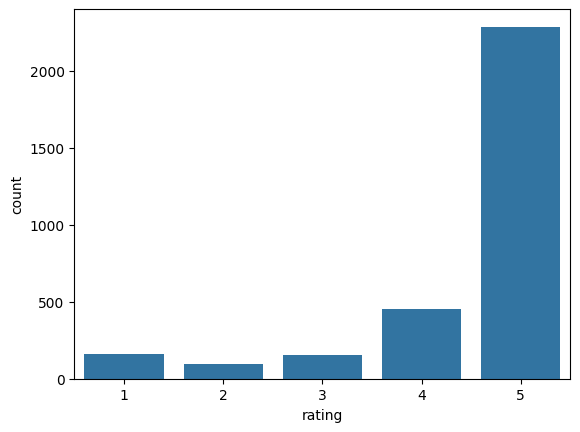

In [105]:
sns.countplot(x=df_alexa["rating"],data=df_alexa)

<Axes: xlabel='rating', ylabel='Count'>

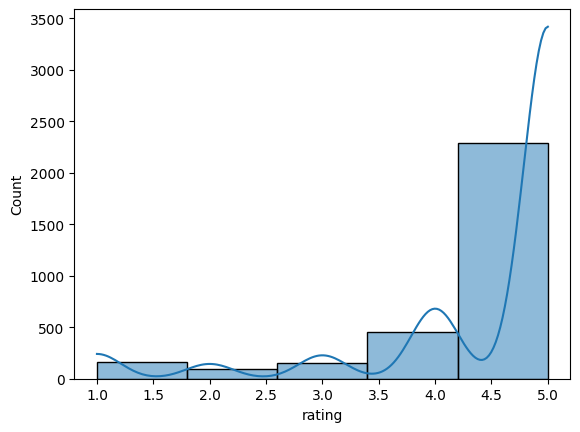

In [106]:
sns.histplot(x=df_alexa["rating"],data=df_alexa,kde=True,bins=5)

<Axes: xlabel='variation', ylabel='rating'>

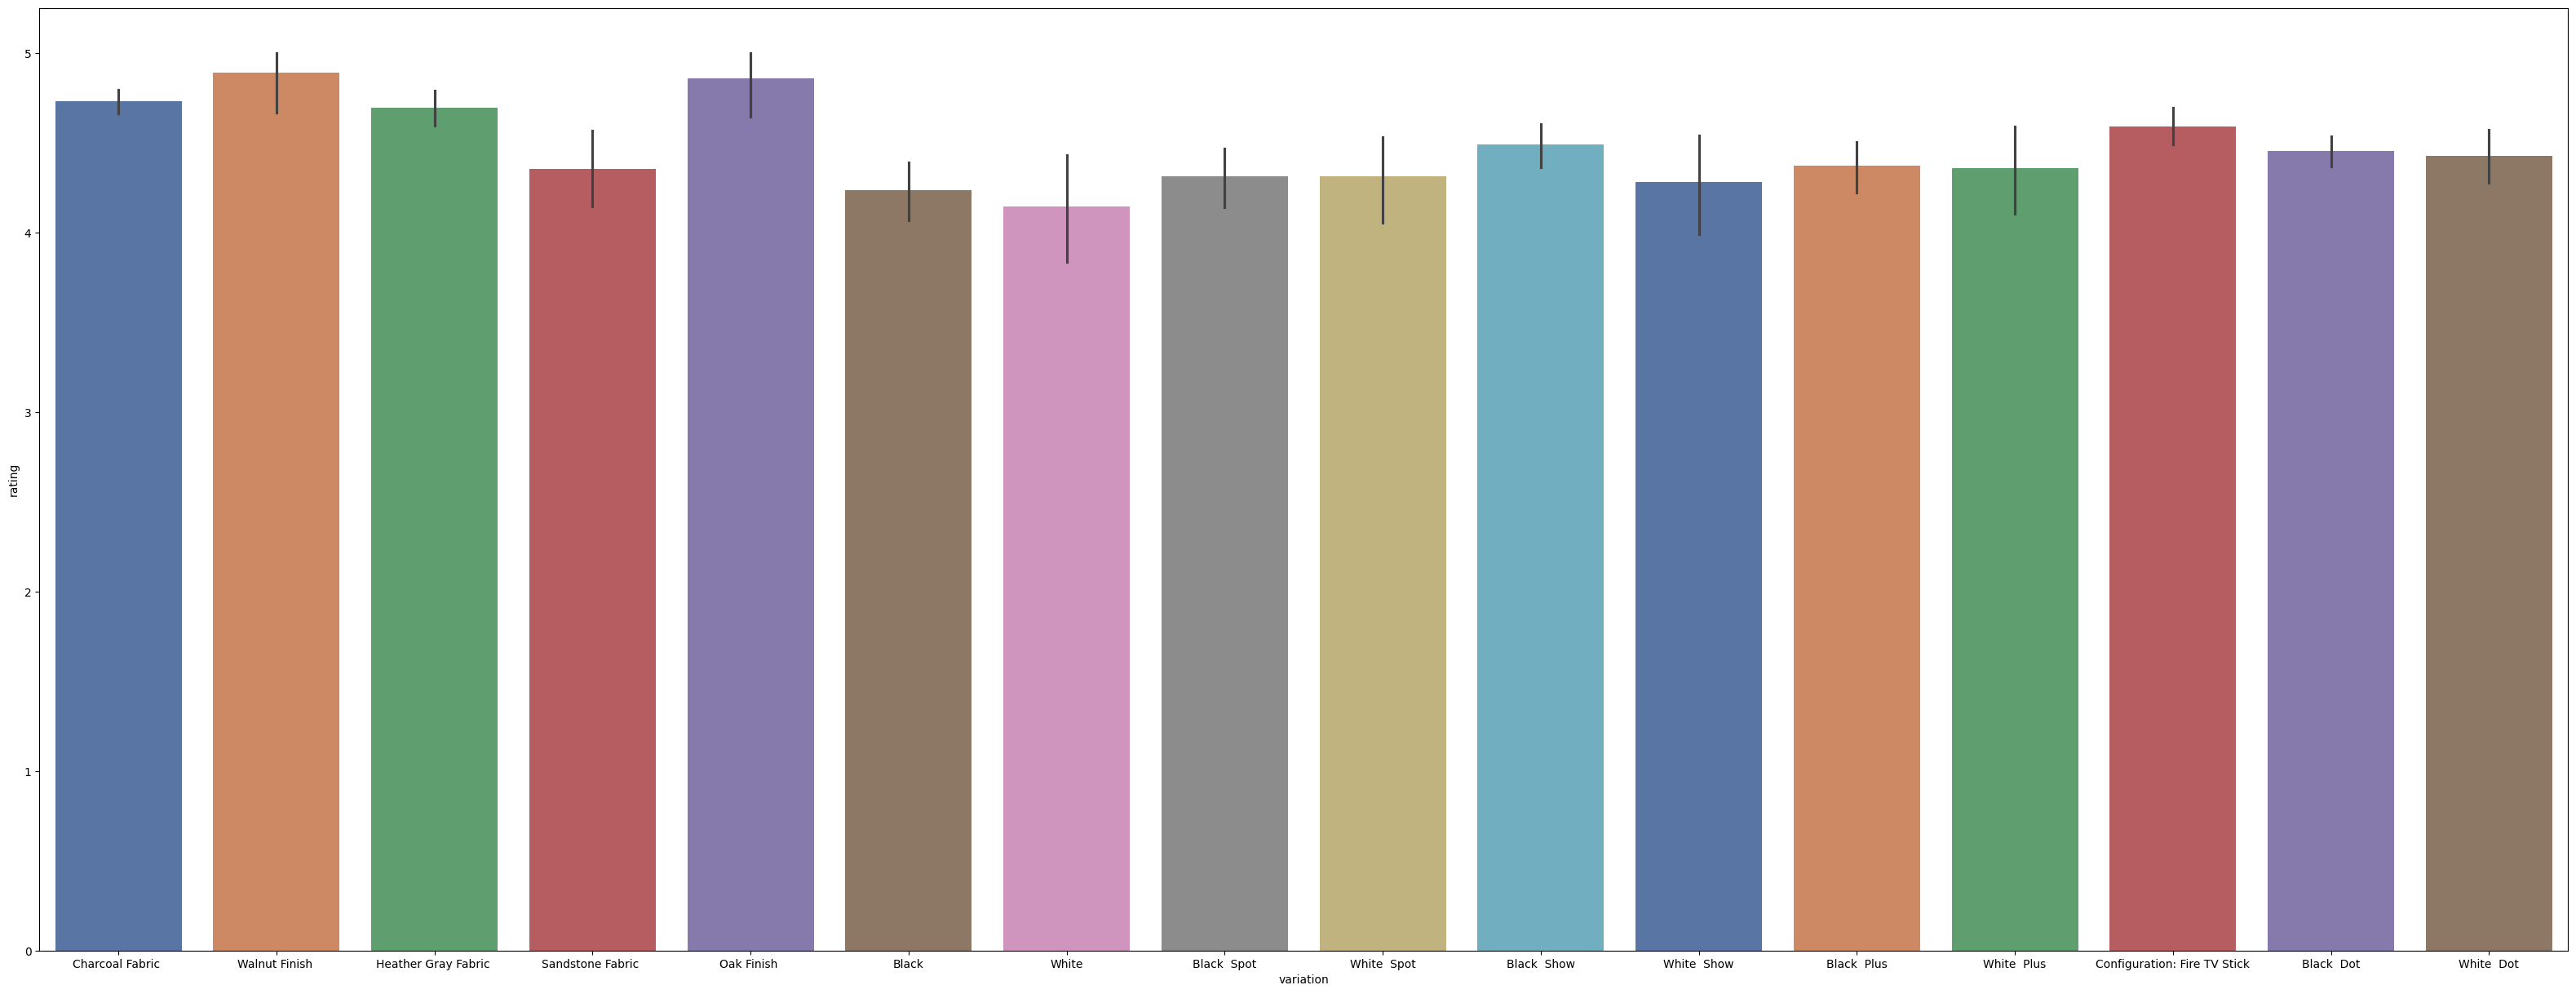

In [107]:
plt.figure(figsize=(40,15))
sns.barplot(x="variation",y="rating",data=df_alexa,palette="deep")

**STEP 04#DATA CLEANING**

In [108]:
df_alexa.drop(["date"],inplace=True,axis=1)

In [109]:
variation_dummies=pd.get_dummies(df_alexa["variation"],drop_first=True)

In [111]:
variation_dummies.replace({True: 1, False: 0}, inplace=True)

In [112]:
variation_dummies.head(5)

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [113]:
df_alexa.drop(["variation"],inplace=True,axis=1)

In [114]:
df_alexa=pd.concat([df_alexa,variation_dummies],axis=1)

In [115]:
df_alexa.head(5)

,rating,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [120]:
import re
# 1️⃣ Fill NaNs
df_alexa["verified_reviews"] = df_alexa["verified_reviews"].fillna("")

# 2️⃣ Force to string
df_alexa["verified_reviews"] =df_alexa["verified_reviews"].astype(str)

# 3️⃣ Remove emojis / non-ASCII (optional)
df_alexa["verified_reviews"] = df_alexa["verified_reviews"].apply(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x))


In [121]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
#df_alexa.dropna(subset=["verified_reviews"], inplace=True)
alexa_countvectoriser=vectorizer.fit_transform(df_alexa["verified_reviews"])

In [122]:
alexa_countvectoriser.shape

(3150, 4045)

In [126]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zonked' 'zzzz' 'zzzzzzz']


In [127]:
print(alexa_countvectoriser.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [128]:
df_alexa.drop(["verified_reviews"],inplace=True,axis=1)

In [129]:
encoded_reviews=pd.DataFrame(alexa_countvectoriser.toarray())

In [130]:
df_alexa=pd.concat([df_alexa,encoded_reviews],axis=1)

In [131]:
df_alexa.shape

(3150, 4062)

In [132]:
df_alexa.head(5)

,rating,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,4044
0,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
object_columns = df_alexa.columns[df_alexa.dtypes == "object"]
print(object_columns)

Index([], dtype='object')


In [88]:
df_alexa.isnull().sum()

,0
rating,1
feedback,1
Black Dot,1
Black Plus,1
Black Show,1
...,...
4039,1
4040,1
4041,1
4042,1


In [133]:
X=df_alexa.drop(["feedback"],axis=1)
y=df_alexa["feedback"]

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [135]:
X_train.shape

(2520, 4061)

In [136]:
X_test.shape

(630, 4061)

In [137]:
y_train.shape

(2520,)

In [138]:
y_test.shape

(630,)

In [139]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [141]:
randomforest_classifier=RandomForestClassifier(n_estimators=100)

# Convert column names to strings
#X_train.columns = X_train.columns.astype(str)
#X_test.columns = X_test.columns.astype(str)

randomforest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [142]:
y_predict=randomforest_classifier.predict(X_test)

In [143]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[ 50   9]
 [  0 571]]


In [93]:
y_train

,feedback
2482,1.0
2739,1.0
1333,1.0
2190,1.0
2563,1.0
...,...
1425,1.0
3047,0.0
1726,1.0
2255,1.0


In [ ]:
print(classification_report(y_test,y_predict))